In [95]:
#This is an small show case of how to differentiate two very similar pictures
import tensorflow as tf
import numpy as np
from PIL import Image

In [161]:
img_digit=np.zeros(10000,dtype=int)
img_digit_ten=img_digit+10
img_digit_black=img_digit_ten.reshape(100,100)
img_digit_for_test=img_digit_ten.reshape(100,100)

In [165]:
img_digit_for_test.shape

(100, 100)

In [166]:
img_digit_black.shape

(100, 100)

In [137]:
img_digit_for_test[4,5]=11
img_digit_for_test[4,6]=11
img_digit_for_test[4,7]=11

In [155]:
#with the steps above we create an image for test
#only in the fifth row(row 4), some greyscale value changes from 10 to 11, all other points are 10
img_digit_for_test[:10,:10]

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 11, 11, 11, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]])

In [139]:
image_for_test = Image.fromarray(np.uint8(img_digit_for_test)) 

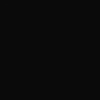

In [140]:
#This image is almost purely black
image_for_test

In [142]:
image_test.save("image_test.png", "PNG")

In [144]:
#filter matrix
filter_matrix=np.array([[1,8,1],[1,8,1],[1,8,1]])

In [150]:
pooled_layer=np.zeros(98*98,dtype=int).reshape(98,98)
for i in range(1,99):
    for j in range(1,99):
        target_matrix=img_digit_for_test[i-1:i+2,j-1:j+2]
        outcome_matrix=target_matrix.dot(filter_matrix)
        maxpool_value=np.max(outcome_matrix)
        pooled_layer[i-1,j-1]=maxpool_value

In [156]:
pooled_layer

array([[240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       ...,
       [240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240]])

In [157]:
pooled_layer[:10,:10]

array([[240, 240, 240, 240, 240, 240, 240, 240, 240, 240],
       [240, 240, 240, 240, 240, 240, 240, 240, 240, 240],
       [240, 240, 240, 248, 256, 264, 256, 248, 240, 240],
       [240, 240, 240, 248, 256, 264, 256, 248, 240, 240],
       [240, 240, 240, 248, 256, 264, 256, 248, 240, 240],
       [240, 240, 240, 240, 240, 240, 240, 240, 240, 240],
       [240, 240, 240, 240, 240, 240, 240, 240, 240, 240],
       [240, 240, 240, 240, 240, 240, 240, 240, 240, 240],
       [240, 240, 240, 240, 240, 240, 240, 240, 240, 240],
       [240, 240, 240, 240, 240, 240, 240, 240, 240, 240]])

In [152]:
pooled_layer_pic = Image.fromarray(np.uint8(pooled_layer)) 

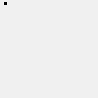

In [159]:
#After pooling, we could locate the edge, which was hidden in the background in original picture
pooled_layer_pic

In [167]:
#Now we test a pure black picture
image_black = Image.fromarray(np.uint8(img_digit_black)) 

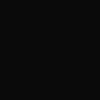

In [168]:
image_black

In [169]:
#Here we use the same filter matrix
pooled_layer_black=np.zeros(98*98,dtype=int).reshape(98,98)
for i in range(1,99):
    for j in range(1,99):
        target_matrix=img_digit_for_test[i-1:i+2,j-1:j+2]
        outcome_matrix=target_matrix.dot(filter_matrix)
        maxpool_value=np.max(outcome_matrix)
        pooled_layer_black[i-1,j-1]=maxpool_value

In [170]:
pooled_layer_black

array([[240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       ...,
       [240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240],
       [240, 240, 240, ..., 240, 240, 240]])

In [171]:
pooled_layer_black_pic = Image.fromarray(np.uint8(pooled_layer_black)) 

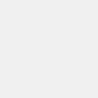

In [173]:
#With the comparation between two pooled layers, we could differentiate the img_for_test from a pure black picture, although they are very similar
pooled_layer_black_pic

In [175]:
#In this case we are using similar technique with the combination of convolutional layers and pooling layers.
#It could differetiate the feature even if it is very close to the background
#For some complicated patterns we could divided the feature into basic components,
#and stack up the filter matrix for each component, it will dectect the complicated patterns
#The hardest part is how to deal with background noise. 
#We usually use White Gaussian Noise to test the robustness of the model, but in real world, 
#different dataset and pictures would have different kind of noise, we need to solve it case by case